<a href="https://colab.research.google.com/github/aimazin/ProjectWeek3DS/blob/main/TheCompanyYouKeepCalihousing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.decomposition import PCA

In [ ]:
df=pd.read_csv('/content/sample_data/california_housing_train.csv')

In [ ]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [ ]:
df1=pd.read_csv('/content/sample_data/california_housing_test.csv')

In [ ]:
df.shape

(17000, 9)

In [ ]:
df['viscosity(nimble)']=df.median_house_value / df.total_rooms

In [ ]:
df['latlo']= (df.longitude**2+df.latitude**2)**.5

In [ ]:
df.drop(['median_house_value','total_bedrooms','total_rooms','longitude','latitude'],axis=1,inplace=True)

In [ ]:
df1['viscosity(nimble)']=df1.median_house_value / df1.total_rooms
df1['latlo']= -(df1.longitude**2+df1.latitude**2)**.5
df1.drop(['median_house_value','total_bedrooms','total_rooms','longitude','latitude'],axis=1,inplace=True)

In [ ]:
df.head()

,housing_median_age,population,households,median_income,viscosity(nimble),latlo
0,15.0,1015.0,472.0,1.4936,11.920884,-119.313588
1,19.0,1129.0,463.0,1.8200,10.470588,-119.527155
2,17.0,333.0,117.0,1.6509,119.027778,-119.411095
3,14.0,515.0,226.0,3.1917,48.900733,-119.406593
4,20.0,624.0,262.0,1.9250,45.048143,-119.386891


In [ ]:
df1.head()

,housing_median_age,population,households,median_income,viscosity(nimble),latlo
0,27.0,1537.0,606.0,6.6085,88.725869,-127.642937
1,43.0,809.0,277.0,3.5990,116.887417,-123.161023
2,27.0,1484.0,495.0,5.7934,75.369184,-122.557270
3,28.0,49.0,11.0,6.1359,4925.373134,-123.097043
4,19.0,850.0,237.0,2.9375,65.834005,-125.063095


In [ ]:
X=df[df.columns[df.columns!='viscosity(nimble)']]
X.shape

(17000, 5)

In [ ]:
X = np.array(X)

In [ ]:
X1=df1[df1.columns[df1.columns!='viscosity(nimble)']]

In [ ]:
X1 = np.array(X1)

<Axes: >

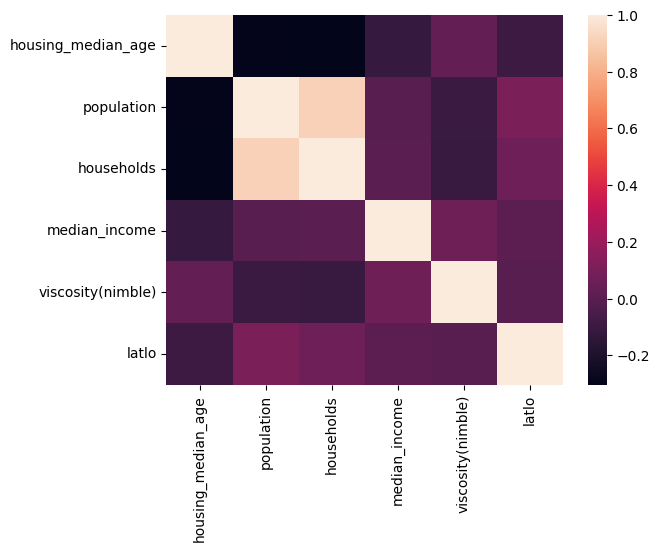

In [ ]:
cor=df.corr()
sns.heatmap(cor)

In [ ]:
y=df['viscosity(nimble)']

In [ ]:
y1=df1['viscosity(nimble)']

In [ ]:
class KNNRegressor():
    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X, K, epsilon=None):
        N = len(X)
        y_hat = np.zeros(N)

        if epsilon is None:
            epsilon = (np.max(self.X) - np.min(self.X)) * 11  # Adjust the fraction as needed

        for i in range(N):
            dist2 = np.sum((self.X - X[i]) ** 2, axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = 1 / (np.sqrt(dist2[idxt]) + epsilon)
            y_hat[i] = np.sum(self.y[idxt] * gamma_k) / np.sum(gamma_k)

        return y_hat


In [ ]:
knn = KNNRegressor()
knn.fit(X,y)

In [ ]:
K = 10  # Number of neighbors
epsilon = 0.01  # Example value for epsilon
y_pred = knn.predict(X1, K, epsilon)

In [ ]:
pd.Series(y).describe()

count    17000.000000
mean       153.008447
std        881.291050
min          1.595445
25%         49.862826
50%         84.482091
75%        140.144992
max      68750.000000
Name: viscosity(nimble), dtype: float64

In [ ]:
pd.Series(y1).describe()

count     3000.000000
mean       166.262302
std        605.663018
min          5.103559
25%         51.584092
50%         85.599891
75%        140.844379
max      15277.777778
Name: viscosity(nimble), dtype: float64

In [ ]:
pd.DataFrame(y_pred).describe()

,0
count,3000.000000
mean,142.072681
std,457.513721
min,9.240150
25%,60.984935
50%,81.814435
75%,114.805791
max,11570.376752


<AxesSubplot:xlabel='latlo', ylabel='viscosity(nimble)'>

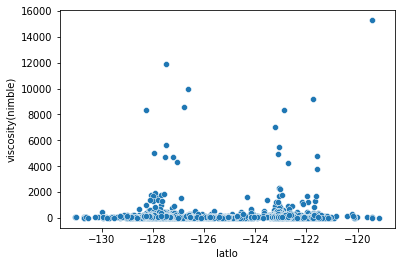

In [ ]:
sns.scatterplot(data=df1 , x='latlo', y='viscosity(nimble)')

<AxesSubplot:xlabel='median_income', ylabel='viscosity(nimble)'>

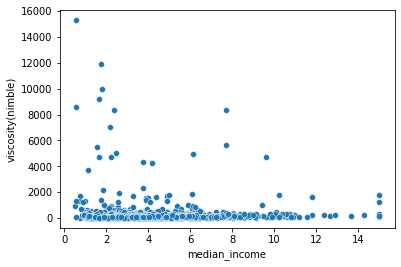

In [ ]:
sns.scatterplot(data=df1 , x='median_income', y='viscosity(nimble)')

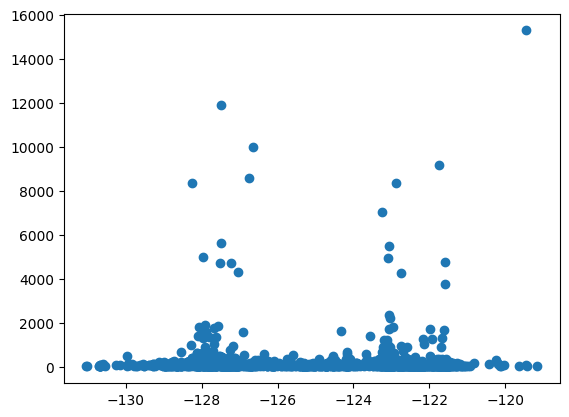

In [ ]:
plt.scatter(x=df1.latlo, y=y1)

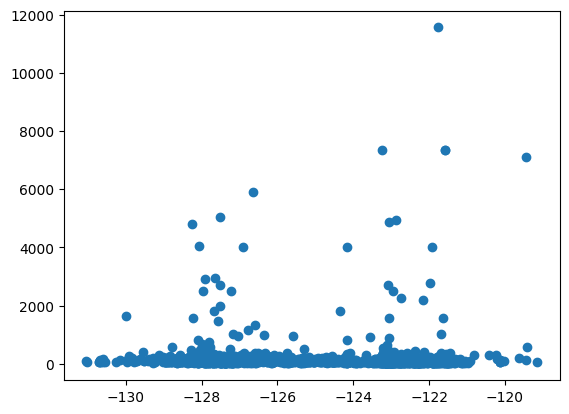

In [ ]:
plt.scatter(x=df1.latlo, y=y_pred)